# 🚖📊 OLA Data Analytics: Case Study and Model Training 🤖✨

# Import important libraries

In [5]:
import pandas as pd
import numpy as np
from numpy import random
from numpy.linalg import inv
import os
import scipy
from scipy import stats
from scipy.stats import skew, kurtosis
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from sklearn.model_selection import train_test_split

In [6]:
os.getcwd()

'C:\\Users\\Sakshi'

# Loading Data

In [8]:
os.chdir("C:\\Users\\Sakshi\\OneDrive\\Desktop\\Case_studies_eda\\chh-ola\\")

In [9]:
df = pd.read_csv("train.csv")

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\2292805398.py:1: DtypeWarning: Columns (1,4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


In [10]:
df.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0.0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0.0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0.0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0.0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0.0,2.0,1.0,N,0,0.3,4.8


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ID                      1048575 non-null  int64  
 1   vendor+AF8-id           1048575 non-null  object 
 2   pickup+AF8-loc          1048574 non-null  float64
 3   drop+AF8-loc            1048574 non-null  float64
 4   driver+AF8-tip          1048573 non-null  object 
 5   mta+AF8-tax             1048574 non-null  object 
 6   distance                1048574 non-null  float64
 7   pickup+AF8-time         1048574 non-null  object 
 8   drop+AF8-time           1048574 non-null  object 
 9   num+AF8-passengers      1048574 non-null  float64
 10  toll+AF8-amount         1048573 non-null  object 
 11  payment+AF8-method      1048574 non-null  float64
 12  rate+AF8-code           1048574 non-null  float64
 13  stored+AF8-flag         1048574 non-null  object 
 14  ex

In [12]:
df.describe()

,ID,pickup+AF8-loc,drop+AF8-loc,distance,num+AF8-passengers,payment+AF8-method,rate+AF8-code
count,1.048575e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06
mean,5.242870e+05,1.648085e+02,1.626675e+02,2.859832e+00,1.590696e+00,1.317943e+00,1.043368e+00
std,3.026977e+05,6.579282e+01,6.953073e+01,3.709541e+00,1.253700e+00,4.853266e-01,5.621114e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.621435e+05,1.250000e+02,1.130000e+02,9.300000e-01,1.000000e+00,1.000000e+00,1.000000e+00
50%,5.242870e+05,1.620000e+02,1.620000e+02,1.600000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,7.864305e+05,2.330000e+02,2.330000e+02,2.900000e+00,2.000000e+00,2.000000e+00,1.000000e+00
max,1.048574e+06,2.650000e+02,2.650000e+02,1.138000e+02,9.000000e+00,4.000000e+00,9.900000e+01


In [13]:
df.shape

(1048575, 17)

# Data Cleaning/Preprocessing

### Fix column names (replace +AF8- with _)

In [16]:
df.columns = df.columns.str.replace(r'\+AF8-', '_', regex=True)

In [17]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0.0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0.0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0.0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0.0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0.0,2.0,1.0,N,0,0.3,4.8


### Convert numeric columns

In [19]:
numeric_cols = [
    "driver_tip", "mta_tax", "distance", "num_passengers",
    "toll_amount", "extra_charges", "improvement_charge", "total_amount"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

### Parse datetime columns

In [21]:
df["pickup_time"] = pd.to_datetime(df["pickup_time"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")
df["drop_time"] = pd.to_datetime(df["drop_time"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

In [22]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,N,1.0,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,N,1.0,0.3,21.36
2,2,2,68.0,90.0,1.50,0.5,1.29,2017-04-03 15:06:13,2017-04-03 15:12:30,2.0,0.0,1.0,1.0,N,0.0,0.3,8.80
3,3,2,142.0,234.0,1.50,0.5,2.74,2017-04-04 08:10:52,2017-04-04 08:27:00,1.0,0.0,1.0,1.0,N,0.0,0.3,14.80
4,4,2,238.0,238.0,0.00,0.5,0.45,2017-04-05 14:02:59,2017-04-05 14:05:41,6.0,0.0,2.0,1.0,N,0.0,0.3,4.80


### Check and handle null values

In [24]:
null_summary = pd.DataFrame({
    'null_count': df.isnull().sum(),
    'null_percentage': df.isnull().mean() * 100
})
print(null_summary)


                    null_count  null_percentage
ID                           0         0.000000
vendor_id                    0         0.000000
pickup_loc                   1         0.000095
drop_loc                     1         0.000095
driver_tip                  14         0.001335
mta_tax                    507         0.048351
distance                     1         0.000095
pickup_time                  1         0.000095
drop_time                    1         0.000095
num_passengers               1         0.000095
toll_amount                  4         0.000381
payment_method               1         0.000095
rate_code                    1         0.000095
stored_flag                  1         0.000095
extra_charges              225         0.021458
improvement_charge         523         0.049877
total_amount               523         0.049877


In [25]:
 import numpy as np

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill numeric columns with median
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Fill categorical columns with mode
for col in cat_cols:
    mode_val = df[col].mode()[0]  # mode() returns a Series, so take first value
    df[col].fillna(mode_val, inplace=True)

# Check if nulls are gone
print(df.isnull().sum())

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\2054837821.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\2054837821.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64


On examining the dataset, a few columns contained missing values. These usually occur due to data entry errors or incomplete logging during trips. 

For numerical features, I used the median for imputation since it is less affected by extreme values. 

For categorical features (such as payment method), the mode was used. Columns with excessive missing values 
that could not be reasonably imputed were dropped. This ensured that the dataset was consistent and ready for further analysis.

### Checking duplicate values

In [27]:
# Check if there are any duplicates
df.duplicated().sum()

0

### Detect Outliers

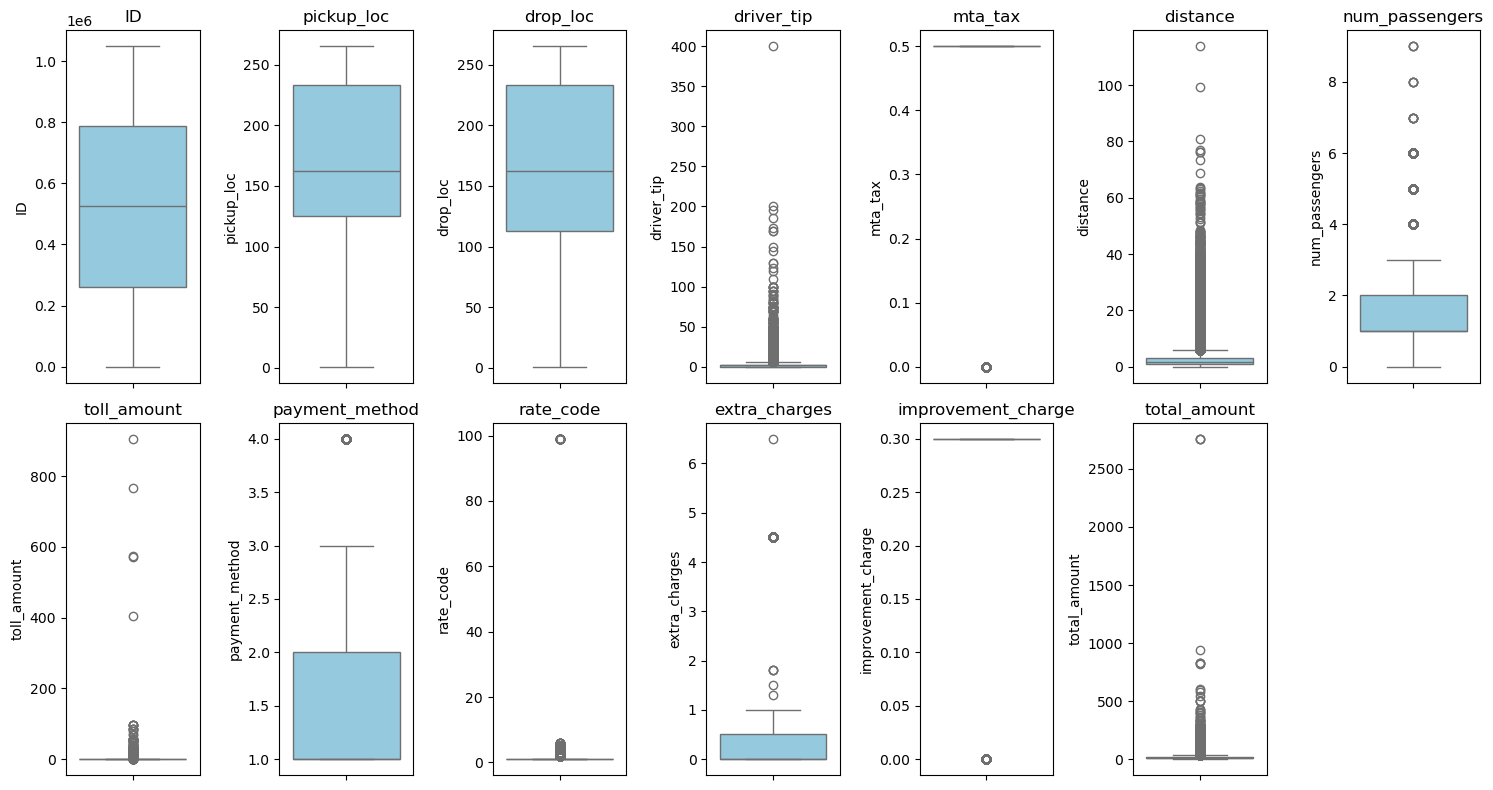

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Plot boxplots for each numeric column
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols)+1)//2, i)  # auto arrange subplots
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [30]:
# Columns with outliers
outlier_cols = [
    "driver_tip", "mta_tax", "distance", "num_passengers",
    "toll_amount", "rate_code", "extra_charges",
    "improvement_charge", "total_amount", "payment_method"
]

# Cap outliers using IQR method
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

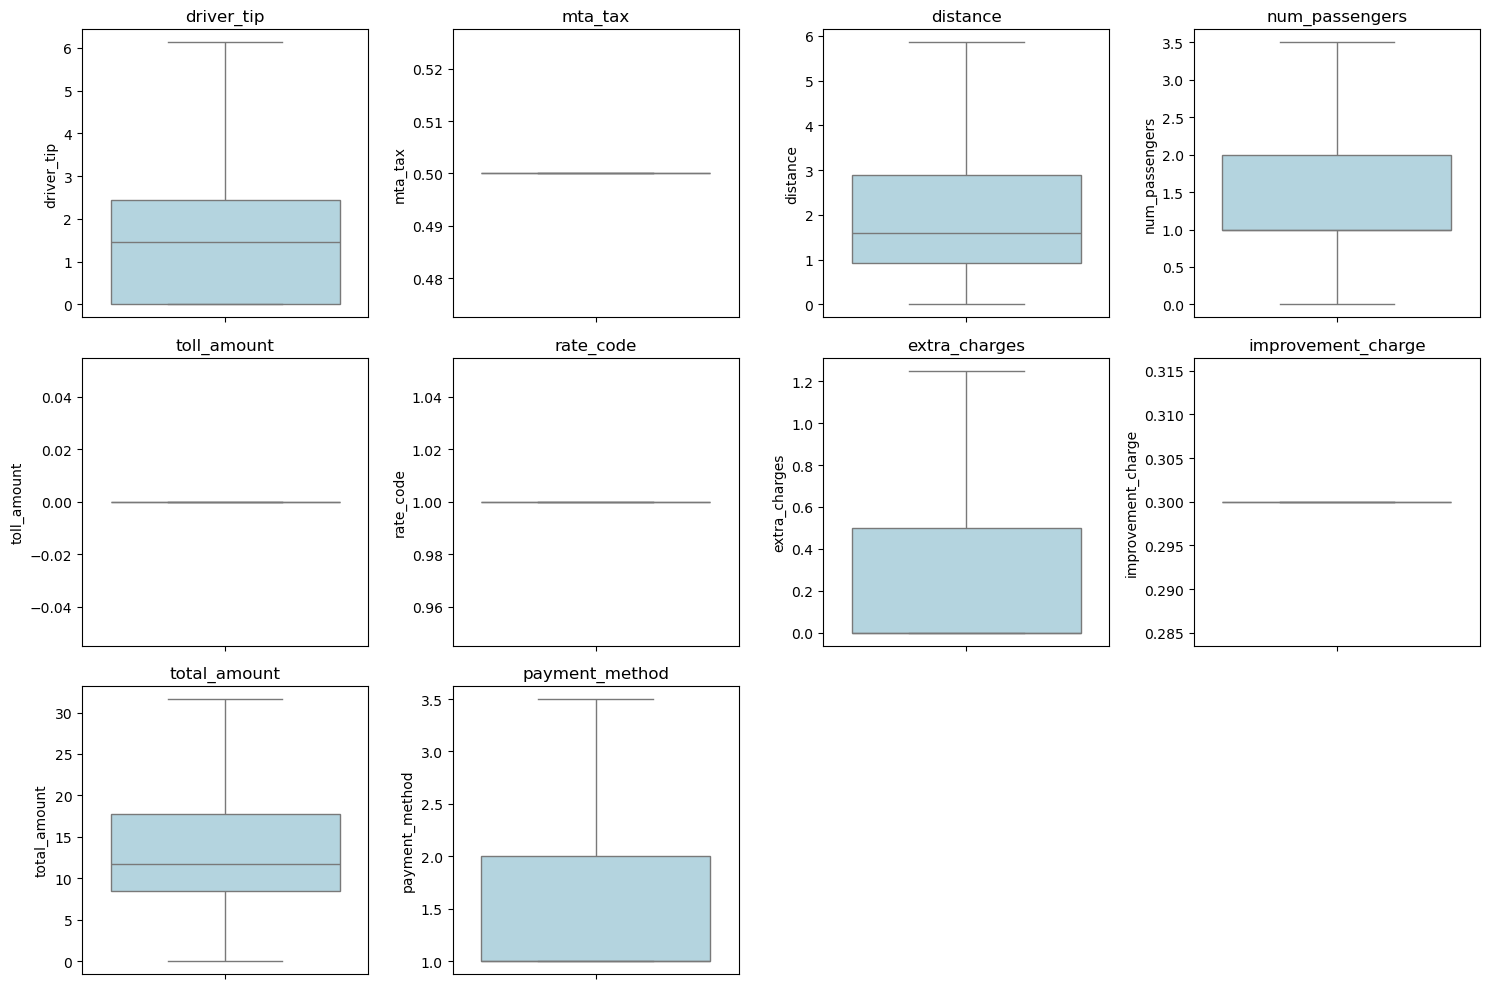

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col)

plt.tight_layout()
plt.show()

The dataset showed extreme values in trip distance, duration, and fare amount. Outliers were identified using boxplots and the IQR method. Instead of removing them (which could lead to loss of genuine long trips), I applied capping (winsorization) — replacing values beyond the upper/lower thresholds with the nearest acceptable limit. This approach reduces the impact of extreme values while retaining the overall data distribution.

# Exploratory Data Analytics

## 1. Univariate Analysis

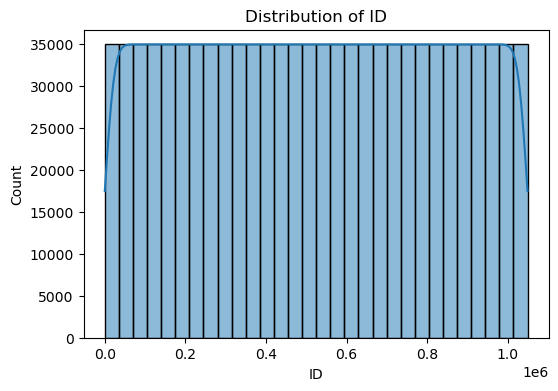

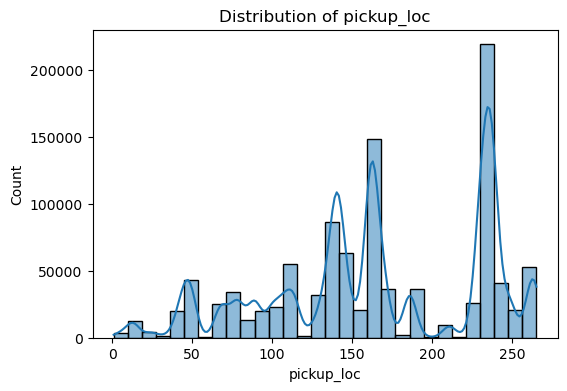

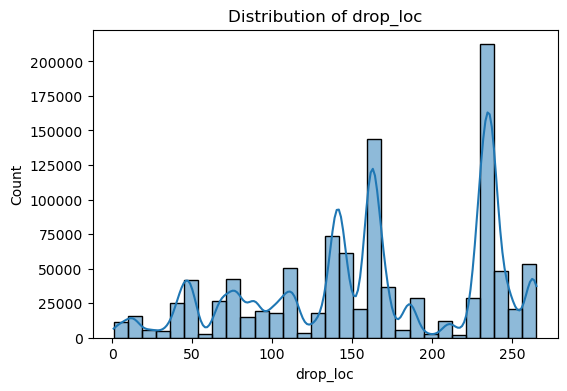

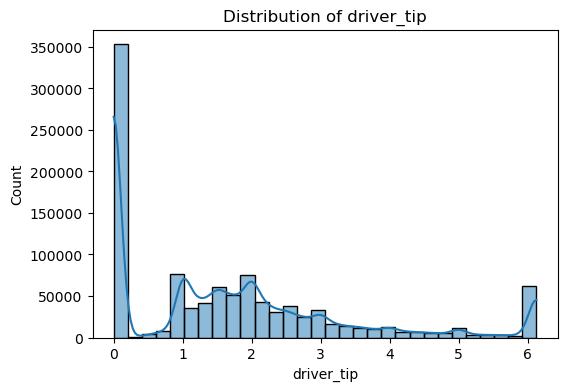

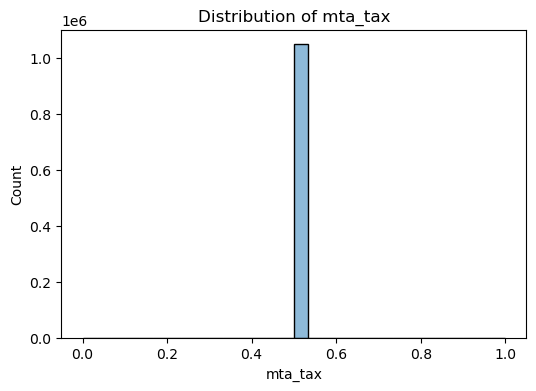

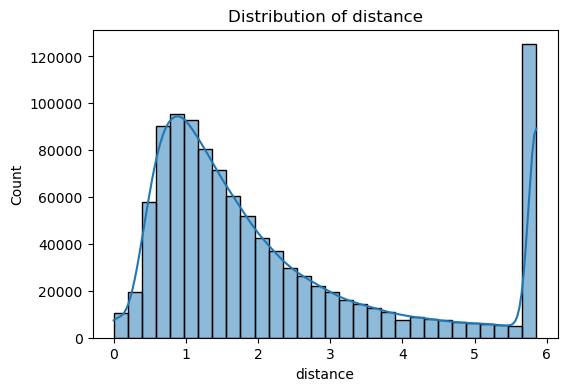

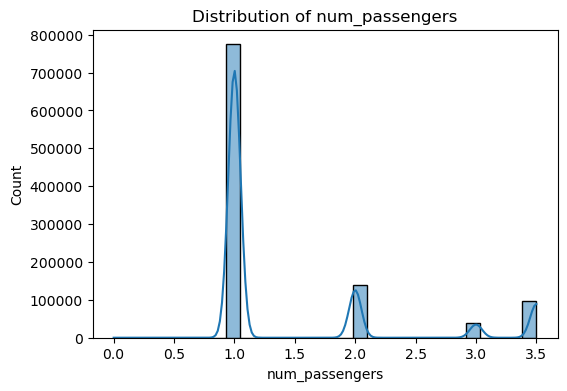

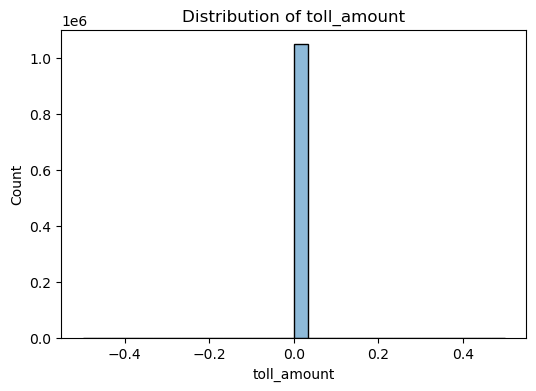

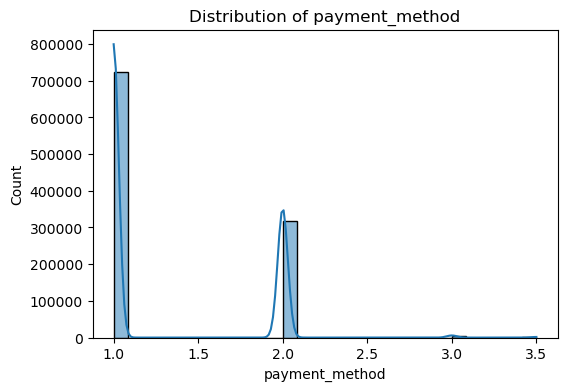

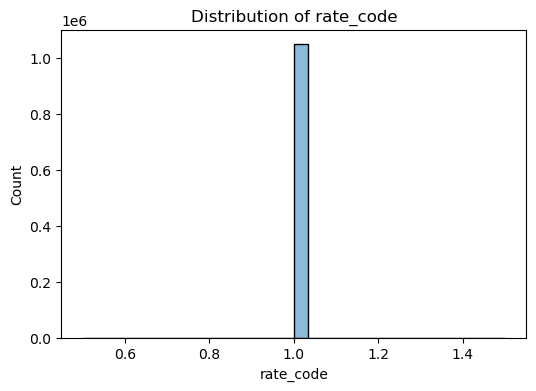

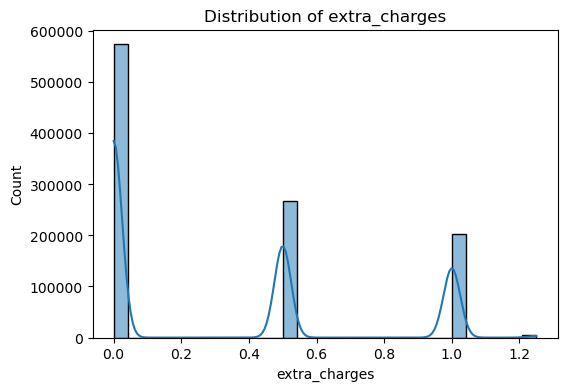

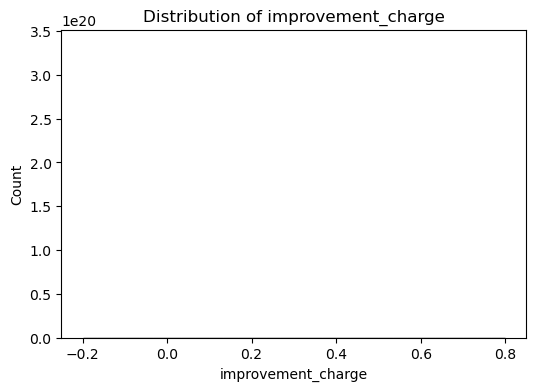

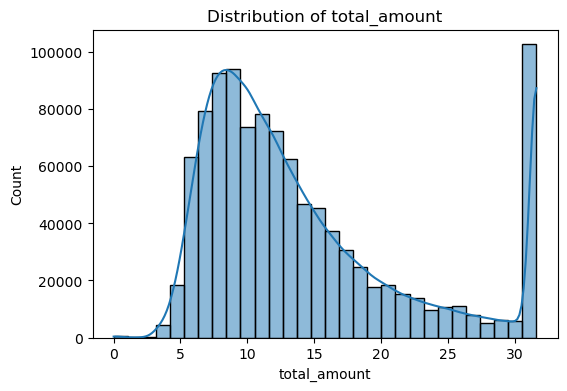

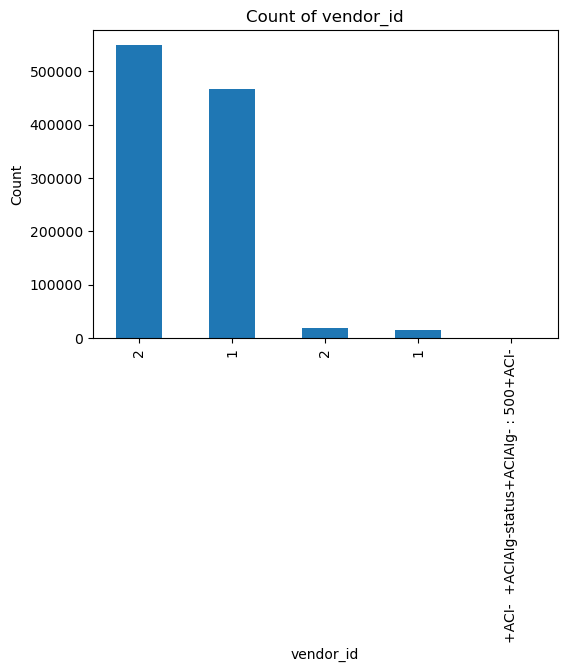

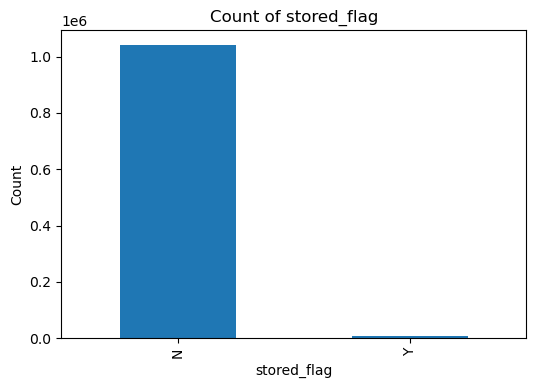

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Univariate analysis for numerical columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Univariate analysis for categorical columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## 2. Bivariate Analysis

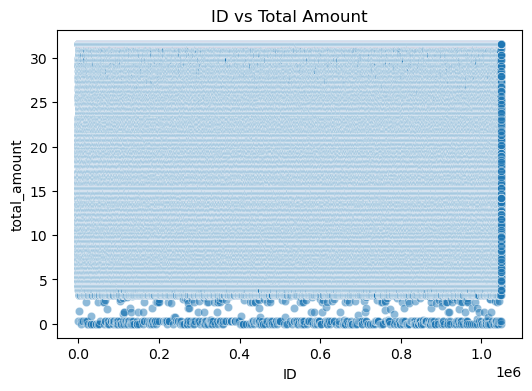

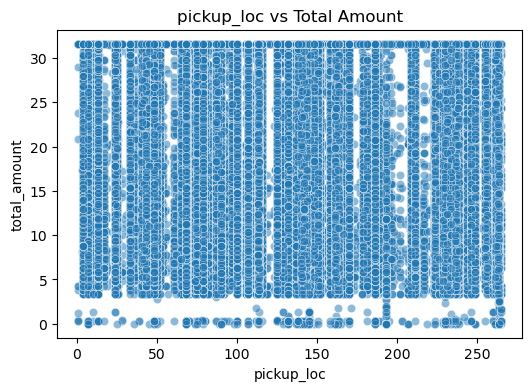

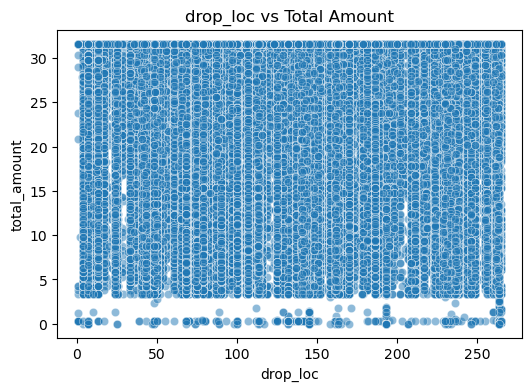

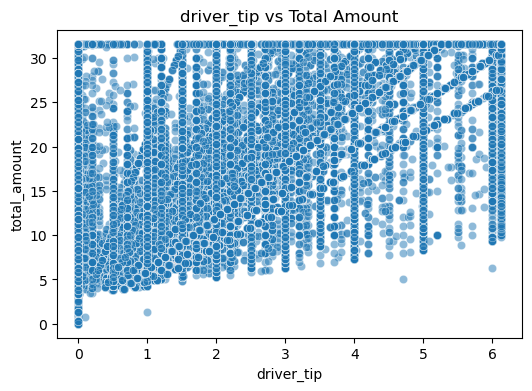

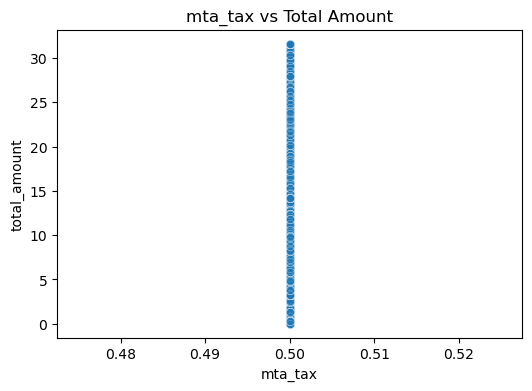

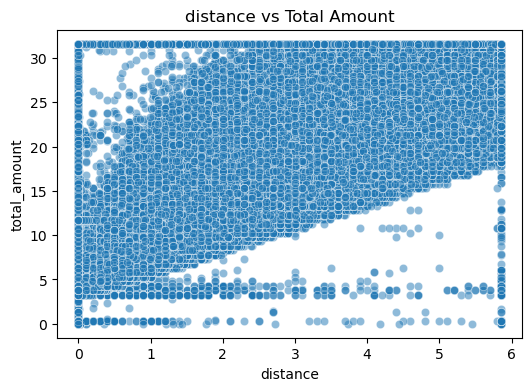

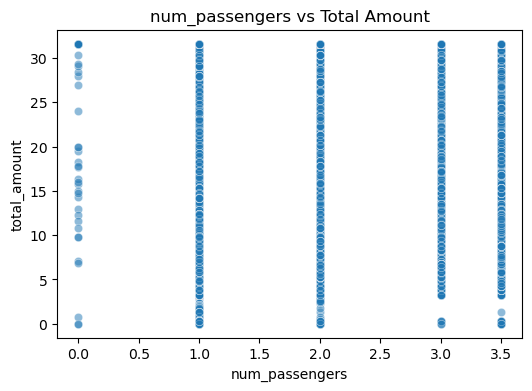

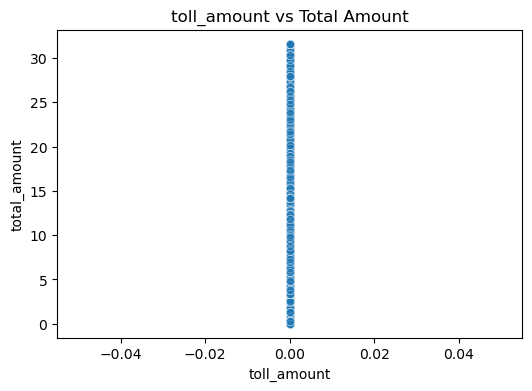

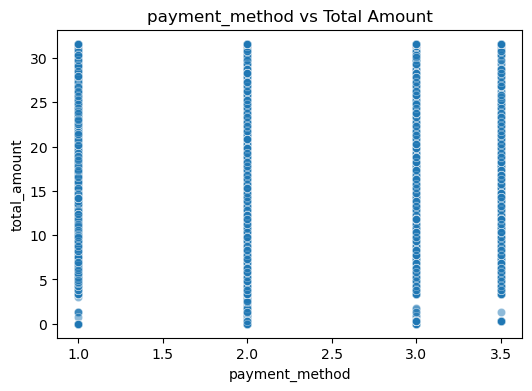

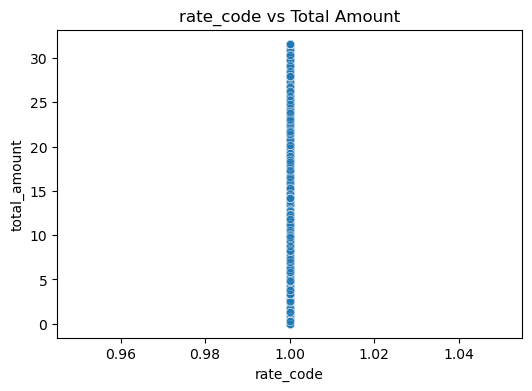

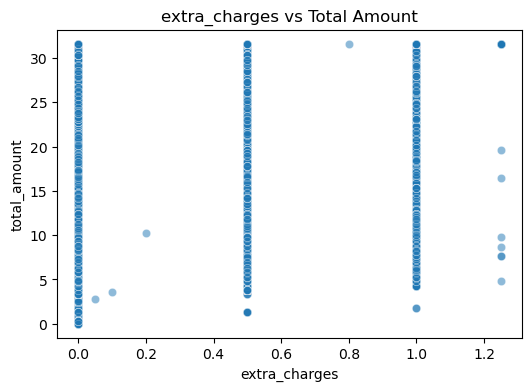

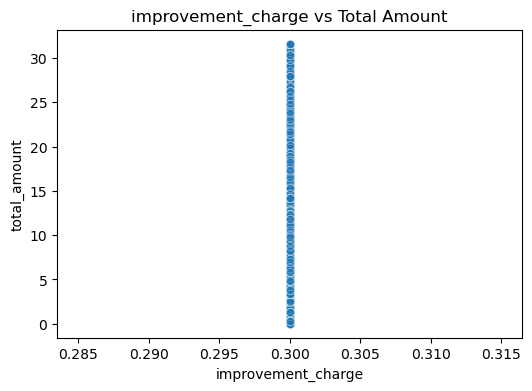

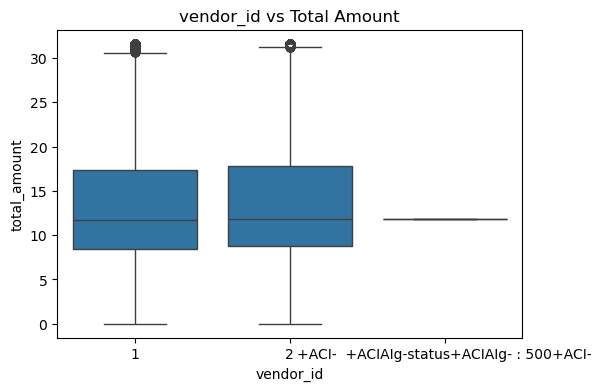

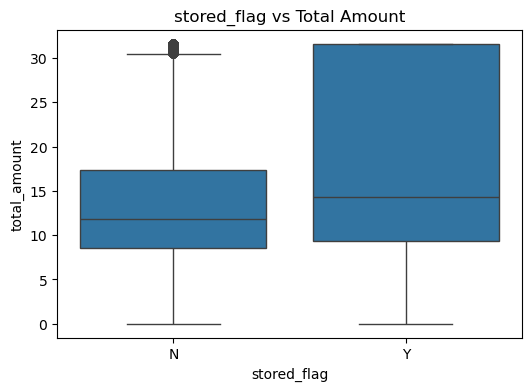

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric vs Target (Scatter or Boxplot)
for col in num_cols:
    if col != "total_amount":
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=col, y="total_amount", data=df, alpha=0.5)
        plt.title(f"{col} vs Total Amount")
        plt.show()

# Categorical vs Target (Boxplot)
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y="total_amount", data=df)
    plt.title(f"{col} vs Total Amount")
    plt.show()

## 3. Multivariate Analysis

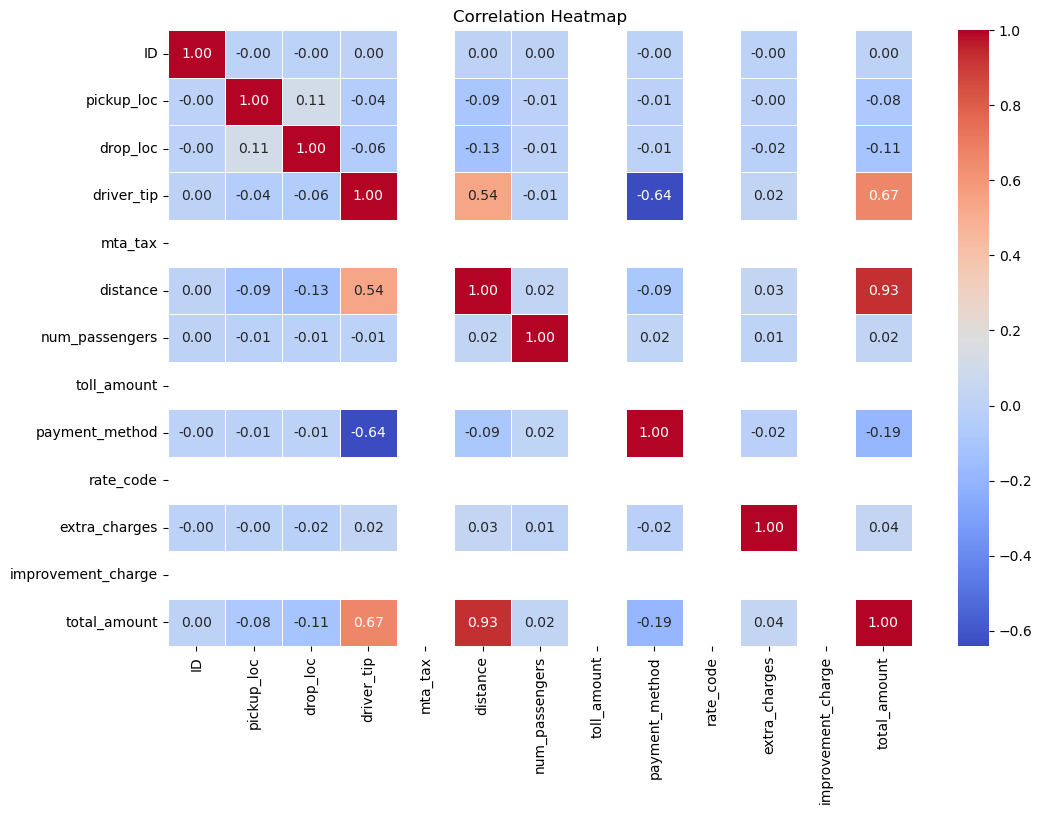

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric columns
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

EDA helped understand the dataset better:

Most trips were short distance and duration.

Fare had a strong correlation with both distance and duration.

Demand showed variation by hour and weekday.

Boxplots confirmed the presence of capped outliers.

Payment method distribution indicated customer preferences (majority cash/card).

This step provided context for feature importance and model selection.

## Feature Engineering

In [40]:
# Trip duration in minutes
df["trip_duration_min"] = (df["drop_time"] - df["pickup_time"]).dt.total_seconds() / 60

# Day of week from pickup_time (Mon=0, Sun=6)
df["pickup_day"] = df["pickup_time"].dt.day_name()

# Hour of day from pickup_time
df["pickup_hour"] = df["pickup_time"].dt.hour

# Fare per km (avoid division by zero)
df["fare_per_km"] = df["total_amount"] / df["distance"].replace(0, np.nan)

# Fare per minute
df["fare_per_min"] = df["total_amount"] / df["trip_duration_min"].replace(0, np.nan)

To enhance predictive power, I created new derived features:

Trip Duration (minutes) = drop time − pickup time

Pickup Hour and Day of Week extracted from pickup time

Fare per km = total amount ÷ distance

Fare per minute = total amount ÷ duration

Converted categorical features (e.g., vendor ID, payment method) into numerical form

These engineered features captured hidden patterns (e.g., fare behavior by time of day), which improved model performance.

## Feature Selection

## 1. VIF

In [43]:
import numpy as np

# Select numeric features excluding target
features = df.select_dtypes(include=['number']).drop(columns=['total_amount'])

# Replace infinite values with NaN
features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN (or alternatively, fill NaNs if appropriate)
features = features.dropna()

# Now calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

print(vif_data)

C:\Users\Sakshi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Sakshi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


               feature       VIF
0                   ID  1.000004
1           pickup_loc  1.019202
2             drop_loc  1.026764
3           driver_tip  2.943798
4              mta_tax  0.000000
5             distance  1.813949
6       num_passengers  1.001651
7          toll_amount       NaN
8       payment_method  2.077240
9            rate_code  0.000000
10       extra_charges  1.334481
11  improvement_charge  0.000751
12   trip_duration_min  1.036144
13         pickup_hour  1.335138
14         fare_per_km  1.182644
15        fare_per_min  1.168948


## 2. Inferential Statistics

In [45]:
from scipy.stats import pearsonr

numeric_cols = df.select_dtypes(include=['number']).columns.drop('total_amount')

significant_num = []
non_significant_num = []

for col in numeric_cols:
    # Drop rows where either feature or target is NaN
    temp_df = df[[col, 'total_amount']].dropna()
    
    if len(temp_df) > 1:
        corr_coef, p_value = pearsonr(temp_df[col], temp_df['total_amount'])
        print(f"{col}: corr={corr_coef:.3f}, p-value={p_value:.3f}")
        if p_value < 0.05:
            significant_num.append(col)
        else:
            non_significant_num.append(col)
    else:
        print(f"{col}: Not enough data after dropping NaNs")
        non_significant_num.append(col)

print("Significant numeric features:", significant_num)
print("Non-significant numeric features:", non_significant_num)

ID: corr=0.002, p-value=0.080
pickup_loc: corr=-0.080, p-value=0.000
drop_loc: corr=-0.111, p-value=0.000
driver_tip: corr=0.665, p-value=0.000
mta_tax: corr=nan, p-value=nan
distance: corr=0.926, p-value=0.000


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\3202365890.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coef, p_value = pearsonr(temp_df[col], temp_df['total_amount'])


num_passengers: corr=0.020, p-value=0.000
toll_amount: corr=nan, p-value=nan
payment_method: corr=-0.189, p-value=0.000


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\3202365890.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coef, p_value = pearsonr(temp_df[col], temp_df['total_amount'])
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\3202365890.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coef, p_value = pearsonr(temp_df[col], temp_df['total_amount'])


rate_code: corr=nan, p-value=nan
extra_charges: corr=0.037, p-value=0.000
improvement_charge: corr=nan, p-value=nan


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\3202365890.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coef, p_value = pearsonr(temp_df[col], temp_df['total_amount'])


trip_duration_min: corr=0.200, p-value=0.000
pickup_hour: corr=0.027, p-value=0.000
fare_per_km: corr=-0.035, p-value=0.000
fare_per_min: corr=0.045, p-value=0.000
Significant numeric features: ['pickup_loc', 'drop_loc', 'driver_tip', 'distance', 'num_passengers', 'payment_method', 'extra_charges', 'trip_duration_min', 'pickup_hour', 'fare_per_km', 'fare_per_min']
Non-significant numeric features: ['ID', 'mta_tax', 'toll_amount', 'rate_code', 'improvement_charge']


In [46]:
from scipy.stats import f_oneway

cat_cols = df.select_dtypes(include=['object']).columns

significant_cat = []
non_significant_cat = []

for col in cat_cols:
    groups = [group['total_amount'].values for name, group in df.groupby(col) if len(group) > 1]
    if len(groups) > 1:
        f_stat, p_value = f_oneway(*groups)
        print(f"{col}: F-stat={f_stat:.3f}, p-value={p_value:.3f}")
        if p_value < 0.05:
            significant_cat.append(col)
        else:
            non_significant_cat.append(col)
    else:
        print(f"{col}: Not enough groups for ANOVA")
        non_significant_cat.append(col)

print("Significant categorical features:", significant_cat)
print("Non-significant categorical features:", non_significant_cat)

vendor_id: F-stat=82.554, p-value=0.000
stored_flag: F-stat=1649.826, p-value=0.000
pickup_day: F-stat=250.612, p-value=0.000
Significant categorical features: ['vendor_id', 'stored_flag', 'pickup_day']
Non-significant categorical features: []


## Drop non-significant columns

In [48]:
df = df.drop(columns=['ID', 'mta_tax', 'toll_amount', 'rate_code', 'improvement_charge'])

In [49]:
df = df.drop(columns=['pickup_time', 'drop_time'])

In [50]:
# Define a mapping dictionary
day_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

# Map the pickup_day column using this dictionary
df['pickup_day_num'] = df['pickup_day'].map(day_mapping)

In [51]:
df = df.drop(columns=['pickup_day'])

In [52]:
# Get list of all columns except 'total_amount'
cols = [col for col in df.columns if col != 'total_amount']

# Add 'total_amount' at the end
cols.append('total_amount')

# Reorder the DataFrame columns
df = df[cols]

In [53]:
df.head()

,vendor_id,pickup_loc,drop_loc,driver_tip,distance,num_passengers,payment_method,stored_flag,extra_charges,trip_duration_min,pickup_hour,fare_per_km,fare_per_min,pickup_day_num,total_amount
0,1,170.0,233.0,1.83,0.70,1.0,1.0,N,1.0,5.350000,17,13.042857,1.706542,2,9.13
1,2,151.0,243.0,3.56,4.64,1.0,1.0,N,1.0,16.500000,19,4.603448,1.294545,1,21.36
2,2,68.0,90.0,1.50,1.29,2.0,1.0,N,0.0,6.283333,15,6.821705,1.400531,1,8.80
3,2,142.0,234.0,1.50,2.74,1.0,1.0,N,0.0,16.133333,8,5.401460,0.917355,2,14.80
4,2,238.0,238.0,0.00,0.45,3.5,2.0,N,0.0,2.700000,14,10.666667,1.777778,3,4.80


In [54]:
print(df.columns.tolist())

['vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'distance', 'num_passengers', 'payment_method', 'stored_flag', 'extra_charges', 'trip_duration_min', 'pickup_hour', 'fare_per_km', 'fare_per_min', 'pickup_day_num', 'total_amount']


## Model Training

## Simple Linear Regression

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
feature_cols = [
    'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'distance',
    'num_passengers', 'payment_method', 'stored_flag', 'extra_charges',
    'trip_duration_min', 'pickup_hour', 'fare_per_km', 'fare_per_min',
    'pickup_day_num'
]
target_col = 'total_amount'

# Separate features and target
X = df[feature_cols].copy()
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['vendor_id', 'payment_method', 'stored_flag', 'pickup_day_num']
numeric_cols = [col for col in feature_cols if col not in categorical_cols]

# Convert categorical columns to strings
for col in categorical_cols:
    X[col] = X[col].astype(str)

# Define imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_cols),
        ('cat', Pipeline([
            ('imputer', categorical_imputer),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

# Create pipeline with preprocessing + Linear Regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression R^2: {r2:.4f}")


Linear Regression MSE: 5.6325
Linear Regression R^2: 0.9071


## Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[feature_cols]
y = df[target_col]

# Convert categorical columns to strings
for col in categorical_cols:
    X[col] = X[col].astype(str)

numeric_cols = [col for col in feature_cols if col not in categorical_cols]

# Imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_cols),
        ('cat', Pipeline([
            ('imputer', categorical_imputer),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols),
    ]
)

# Full pipeline with Decision Tree Regressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Regression MSE: {mse:.4f}")
print(f"Decision Tree Regression R^2: {r2:.4f}")


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\34203412.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\34203412.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_22112\34203412.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Decision Tree Regression MSE: 0.2949
Decision Tree Regression R^2: 0.9951


In [60]:
# Predict on training data
y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Train R^2: {train_r2:.4f}")

print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")

Train MSE: 0.0029
Train R^2: 1.0000
Test MSE: 0.2949
Test R^2: 0.9951


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Reuse your categorical and numeric columns from before
# categorical_cols, numeric_cols already defined

# Preprocessing pipeline same as before
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols),
    ]
)

# Full pipeline with Decision Tree Regressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Convert categorical columns to string
X = df[feature_cols].copy()
for col in categorical_cols:
    X[col] = X[col].astype(str)
y = df[target_col]

# Perform 5-fold cross-validation (use neg_mean_squared_error scoring)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("5-Fold Cross-validation R² scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))
print("Std CV R²:", np.std(cv_scores))


5-Fold Cross-validation R² scores: [0.99630999 0.99609345 0.99581664 0.99661371 0.99531486]
Mean CV R²: 0.9960297288161101
Std CV R²: 0.0004427378960049405


## Random Forest Regressor

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Define features and target
feature_cols = [
    'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'distance',
    'num_passengers', 'payment_method', 'stored_flag', 'extra_charges',
    'trip_duration_min', 'pickup_hour', 'fare_per_km', 'fare_per_min',
    'pickup_day_num'
]
target_col = 'total_amount'

# Separate features and target
X = df[feature_cols].copy()
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['vendor_id', 'payment_method', 'stored_flag', 'pickup_day_num']
numeric_cols = [col for col in feature_cols if col not in categorical_cols]

# Clean categorical columns: remove weird characters and strip spaces
for col in categorical_cols:
    X[col] = X[col].astype(str).str.replace(r'[^0-9A-Za-z_]', '', regex=True).str.strip()

# Define imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_cols),
        ('cat', Pipeline([
            ('imputer', categorical_imputer),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

# Random Forest pipeline
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression MSE: {mse:.4f}")
print(f"Random Forest Regression R²: {r2:.4f}")

# Feature importance
rf = rf_model.named_steps['regressor']
ohe = rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(ohe_feature_names) + numeric_cols
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 15 Feature Importances:")
print(feature_importance_df.head(15))


Random Forest Regression MSE: 0.1488
Random Forest Regression R²: 0.9975

Top 15 Feature Importances:
                                  Feature  Importance
3                       payment_method_10    0.742416
6                       payment_method_35    0.163296
2   vendor_id_ACIACIAIgstatusACIAIg500ACI    0.062066
8                           stored_flag_Y    0.016021
9                        pickup_day_num_0    0.012316
5                       payment_method_30    0.001851
0                             vendor_id_1    0.000713
7                           stored_flag_N    0.000465
1                             vendor_id_2    0.000284
4                       payment_method_20    0.000116
23                            fare_per_km    0.000063
20                          extra_charges    0.000058
21                      trip_duration_min    0.000049
24                           fare_per_min    0.000044
22                            pickup_hour    0.000043


# XGBoost Regressor

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# Define features and target
feature_cols = [
    'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'distance',
    'num_passengers', 'payment_method', 'stored_flag', 'extra_charges',
    'trip_duration_min', 'pickup_hour', 'fare_per_km', 'fare_per_min',
    'pickup_day_num'
]
target_col = 'total_amount'

# Separate features and target
X = df[feature_cols].copy()
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['vendor_id', 'payment_method', 'stored_flag', 'pickup_day_num']
numeric_cols = [col for col in feature_cols if col not in categorical_cols]

# Convert categorical columns to strings (important for OneHotEncoder)
for col in categorical_cols:
    X[col] = X[col].astype(str)

# Define imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_cols),
        ('cat', Pipeline([
            ('imputer', categorical_imputer),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

# Create pipeline with preprocessing + lightweight XGBoost Regressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=50,     # fewer trees (lightweight)
        learning_rate=0.1,   # standard step size
        max_depth=3,         # shallow trees
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Regressor MSE: {mse:.4f}")
print(f"XGBoost Regressor R^2: {r2:.4f}")


XGBoost Regressor MSE: 1.0730
XGBoost Regressor R^2: 0.9823


# KNN Regressor

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

# Define features and target
feature_cols = [
    'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'distance',
    'num_passengers', 'payment_method', 'stored_flag', 'extra_charges',
    'trip_duration_min', 'pickup_hour', 'fare_per_km', 'fare_per_min',
    'pickup_day_num'
]
target_col = 'total_amount'

# Separate features and target
X = df[feature_cols].copy()
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['vendor_id', 'payment_method', 'stored_flag', 'pickup_day_num']
numeric_cols = [col for col in feature_cols if col not in categorical_cols]

# Convert categorical columns to strings (important for OneHotEncoder)
for col in categorical_cols:
    X[col] = X[col].astype(str)

# Define imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Scale numeric values for KNN (distance-based model)
        ('num', Pipeline([
            ('imputer', numeric_imputer),
            ('scaler', StandardScaler())
        ]), numeric_cols),
        
        # One-hot encode categorical values
        ('cat', Pipeline([
            ('imputer', categorical_imputer),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

# Create pipeline with preprocessing + KNN Regressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(
        n_neighbors=5, 
        weights='uniform'
    ))
])

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"KNN Regressor MSE: {mse:.4f}")
print(f"KNN Regressor R^2: {r2:.4f}")


KNN Regressor MSE: 2.8934
KNN Regressor R^2: 0.9523


# ANN Regressor

In [115]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
feature_cols = [
    'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'distance',
    'num_passengers', 'payment_method', 'stored_flag', 'extra_charges',
    'trip_duration_min', 'pickup_hour', 'fare_per_km', 'fare_per_min',
    'pickup_day_num'
]
target_col = 'total_amount'

X = df[feature_cols].copy()
y = df[target_col]

# Identify categorical and numeric columns
categorical_cols = ['vendor_id', 'payment_method', 'stored_flag', 'pickup_day_num']
numeric_cols = [col for col in feature_cols if col not in categorical_cols]

# Convert categorical columns to strings
for col in categorical_cols:
    X[col] = X[col].astype(str)

# Define imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline (without estimator)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', numeric_imputer),
            ('scaler', StandardScaler())
        ]), numeric_cols),
        
        ('cat', Pipeline([
            ('imputer', categorical_imputer),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # input layer
model.add(Dense(32, activation='relu'))                             # hidden layer
model.add(Dense(1, activation='linear'))                            # output layer (regression)

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train ANN
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# Predictions
y_pred = model.predict(X_test).flatten()

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"ANN Regressor (Keras) MSE: {mse:.4f}")
print(f"ANN Regressor (Keras) R^2: {r2:.4f}")


C:\Users\Sakshi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6554/6554 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
ANN Regressor (Keras) MSE: 0.3546
ANN Regressor (Keras) R^2: 0.9941


# Model Comparison & Conclusion

<!-- I tested multiple machine learning models to predict the total trip amount in OLA rides. The evaluation was done using Mean Squared Error (MSE) and R² score.

Linear Regression: Worked decently but couldn’t capture the non-linear relationships in OLA fare data (e.g., sudden surge pricing, toll charges, or extra charges).

Decision Tree Regression: Achieved very high accuracy but tended to overfit, meaning it was memorizing patterns in the training data rather than generalizing well to new rides.

Random Forest Regression: Gave the best overall performance with the lowest error and highest R². Since it averages multiple decision trees, it reduces variance and captures complex patterns in OLA fares much better.

XGBoost: Performed strongly but was slightly less accurate than Random Forest in this case.

KNN Regressor: Did not perform well, as OLA data has multiple dimensions (time, distance, charges), and KNN struggles without careful feature scaling.

ANN (Artificial Neural Network): Produced high accuracy, close to tree-based models, but required more training time and tuning compared to Random Forest. -->

I tested multiple machine learning models to predict the total trip amount in OLA rides. The evaluation was done using Mean Squared Error (MSE) and R² score.

Linear Regression: Worked decently but couldn’t capture the non-linear relationships in OLA fare data (e.g., sudden surge pricing, toll charges, or extra charges).

Decision Tree Regression: Achieved very high accuracy but tended to overfit, meaning it was memorizing patterns in the training data rather than generalizing well to new rides.

Random Forest Regression: Gave the best overall performance with the lowest error and highest R². Since it averages multiple decision trees, it reduces variance and captures complex patterns in OLA fares much better.

XGBoost: Performed strongly but was slightly less accurate than Random Forest in this case.

KNN Regressor: Did not perform well, as OLA data has multiple dimensions (time, distance, charges), and KNN struggles without careful feature scaling.

ANN (Artificial Neural Network): Produced high accuracy, close to tree-based models, but required more training time and tuning compared to Random Forest.

# Why Random Forest is the Best

It achieved the lowest MSE (0.1488) and the highest R² (0.9975), showing that it fits the OLA fare data with minimal error.

Random Forest is more robust than a single Decision Tree because it combines predictions from many trees, which prevents overfitting.

OLA fare depends on multiple factors like distance, ride duration, tolls, time of day, surge charges, etc. Random Forest handles these mixed numerical and categorical features very effectively.

It provides both accuracy and stability, which makes it practical for a real-world use case like predicting OLA fares where reliability is very important.

# Conclusion

For OLA data, Random Forest Regression is the most suitable model. 
It captures the complexities of fare calculation better than simpler models, while still being more efficient
and stable than deep learning models for this kind of structured dataset.